<Axes: title={'center': 'Average Sale Price by Year Built'}, xlabel='YearBuilt'>

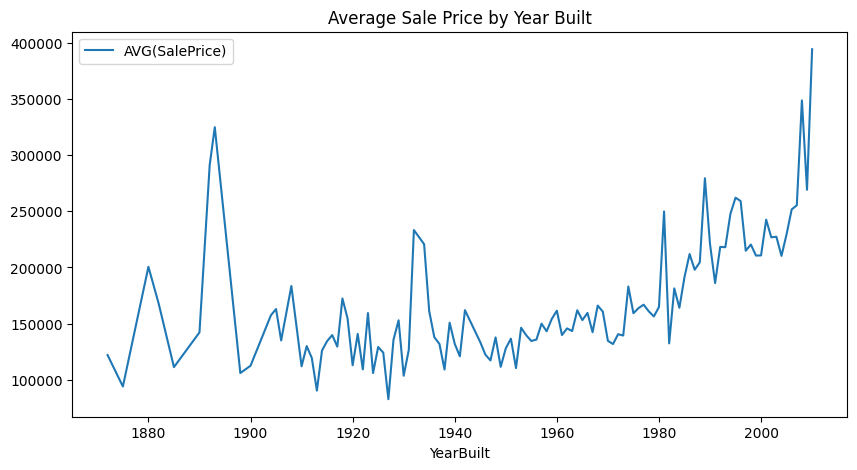

In [13]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import os
import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv.load_dotenv()

connect_args={'ssl': {'tls': True}}
engine = create_engine("mysql+pymysql://{0}:{1}@{2}:3306/incubator"
                       .format(os.environ['MYSQL_USER'], os.environ['MYSQL_PASSWORD'], os.environ['MYSQL_HOST']), 
                       connect_args=connect_args, poolclass=NullPool)
# Line Graph
df = pd.read_sql('SELECT YearBuilt, AVG(SalePrice) FROM incubator.housing_prices_train group by YearBuilt order by YearBuilt asc;', con=engine)
display(df.plot(x='YearBuilt', y='AVG(SalePrice)', kind='line', title='Average Sale Price by Year Built', figsize=(10, 5)))

In [35]:
# Correlation Matrix
df = pd.read_sql('SELECT MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice FROM incubator.housing_prices_train;', con=engine)
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
display(correlation_matrix)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


<Figure size 1600x1200 with 0 Axes>

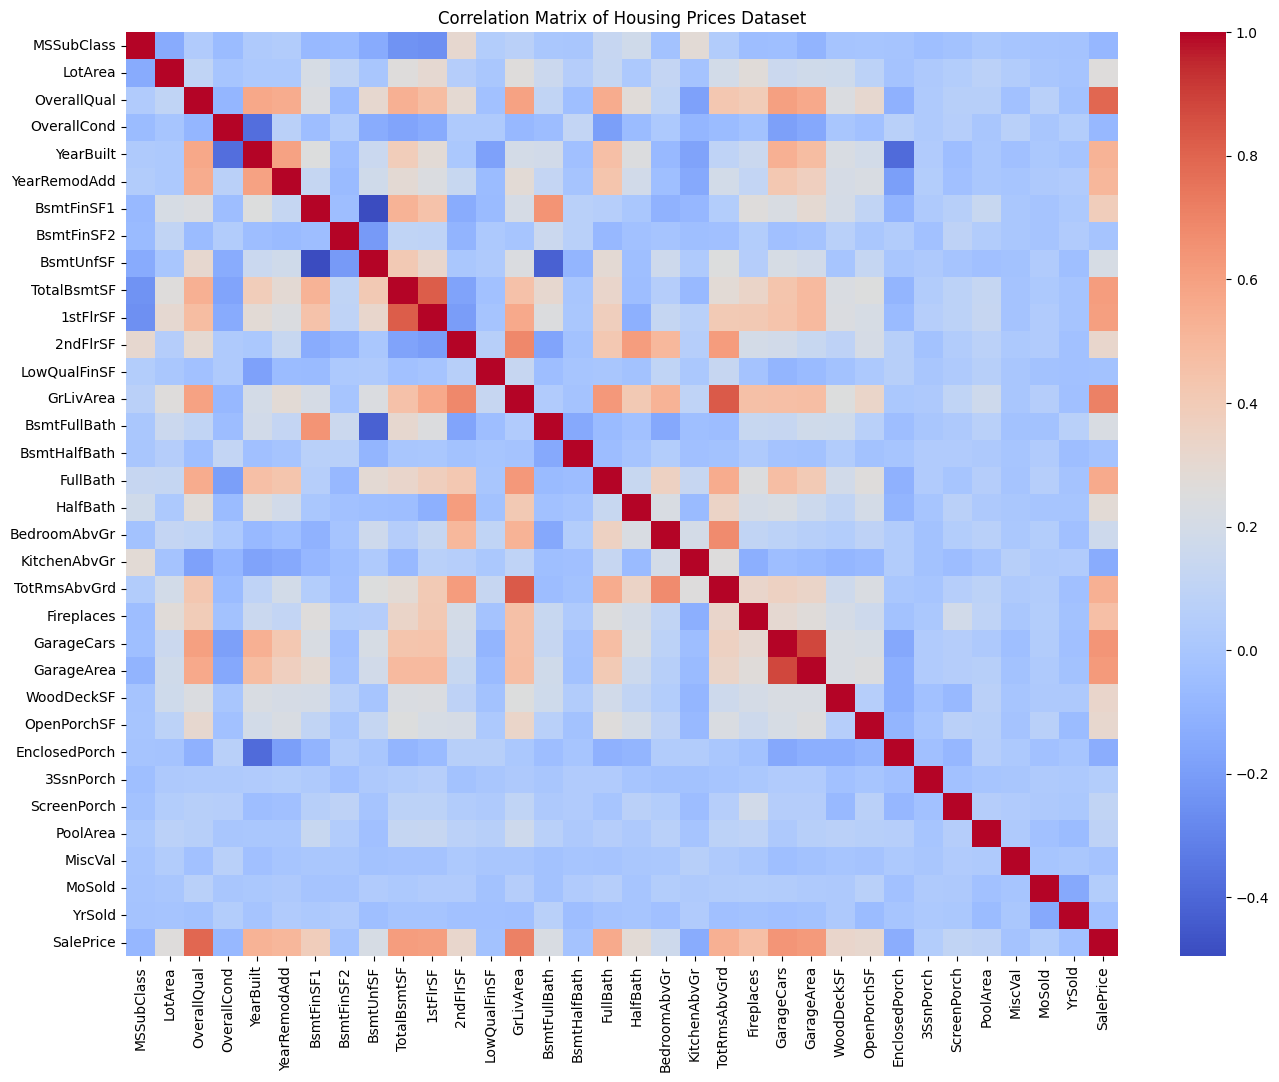

In [36]:
# HeatMap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Housing Prices Dataset")
plt.show()

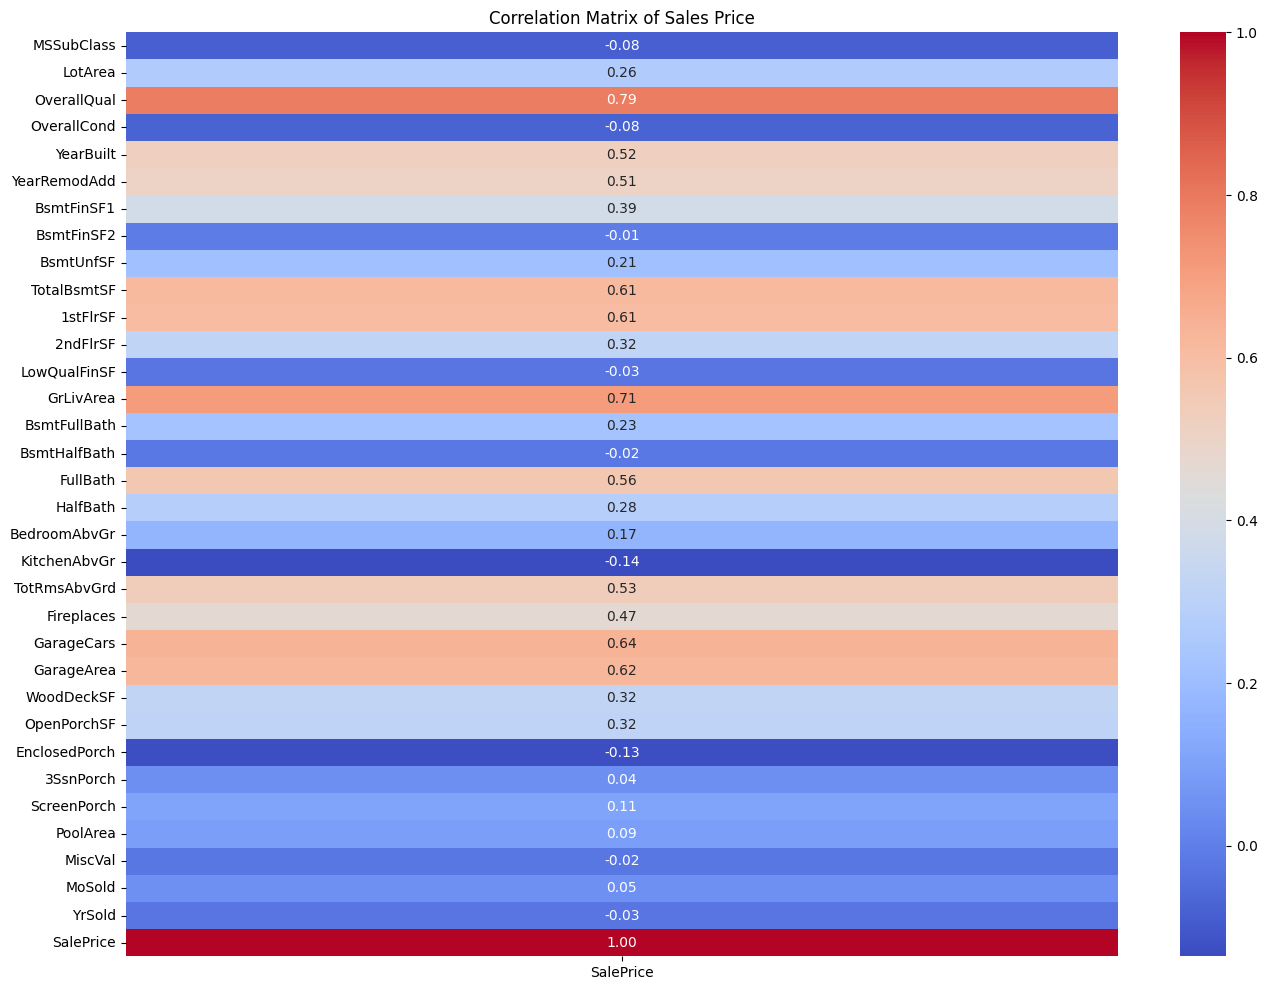

In [37]:
# Correlation Matrix of Sale Price
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Sales Price")
plt.show()